## Compute Drawdowns ##

<AxesSubplot:>

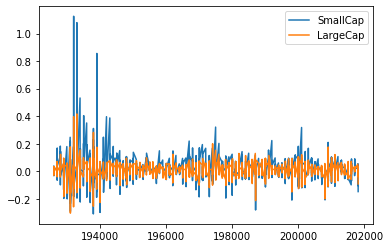

In [1]:
import pandas as pd
portfolio_returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                               header=0,index_col=0,parse_dates=True,na_values=-99.99)
returns = portfolio_returns[['Lo 20','Hi 20']]
returns.columns = ["SmallCap","LargeCap"]
returns = returns/100
returns.plot.line()

In [2]:
returns.head()

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [3]:
returns.index = pd.to_datetime(returns.index,format="%Y%m")

In [4]:
returns.index = returns.index.to_period('M')

In [5]:
returns.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


## Compute Drawdowns ##

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown - whichs is the wealth value as a percentage of previous peak 

In [21]:
wealth_index = 1000*(1+returns["LargeCap"]).cumprod()

In [22]:
wealth_index.head()

1926-07    1033.300000
1926-08    1057.375890
1926-09    1056.424252
1926-10    1025.259736
1926-11    1057.657944
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

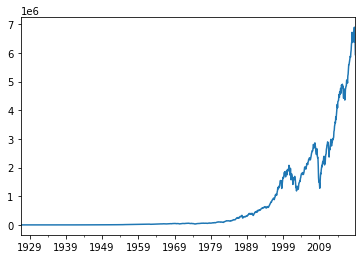

In [23]:
wealth_index.plot.line()

In [24]:
previous_peaks = wealth_index.cummax()

<AxesSubplot:>

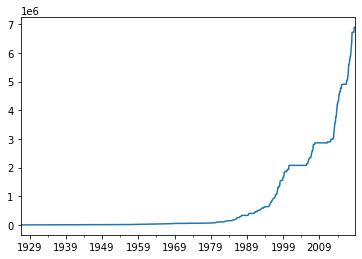

In [25]:
previous_peaks.plot()

<AxesSubplot:>

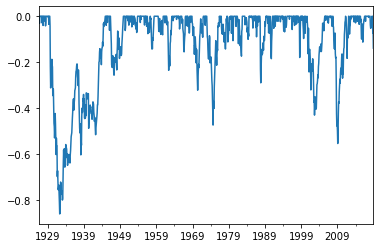

In [26]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [27]:
drawdown.head()

1926-07    0.000000
1926-08    0.000000
1926-09   -0.000900
1926-10   -0.030373
1926-11    0.000000
Freq: M, Name: LargeCap, dtype: float64

In [28]:
drawdown["1998":"2016"].min()

-0.5527349978713652

In [29]:
drawdown["1998":"2016"].idxmin()

Period('2009-02', 'M')

In [26]:
drawdown.idxmin()

Period('1932-05', 'M')

In [27]:
def drawdown(return_series: pd.Series):
    """""
    Takes a time series of asset returns
    Computes and returns a DataFram that contains
    the wealth index
    the previous peaks
    percent drawndown
    """""
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

In [29]:
drawdown(returns["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [30]:
drawdown(returns["LargeCap"])[["Wealth","Peaks"]].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot:>

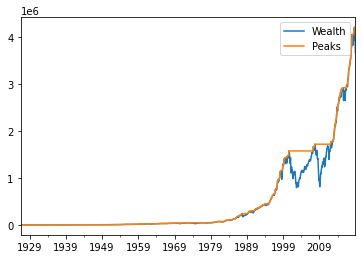

In [31]:
drawdown(returns["LargeCap"])[["Wealth","Peaks"]].plot()

<AxesSubplot:>

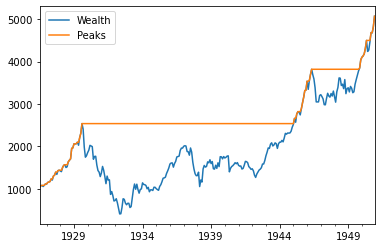

In [32]:
drawdown(returns[:"1950"]["LargeCap"])[["Wealth","Peaks"]].plot()

In [33]:
drawdown(returns["LargeCap"])["Drawdown"].min()

-0.8400375277943123

In [34]:
drawdown(returns["SmallCap"])["Drawdown"].min()

-0.8330007793945303

In [35]:
drawdown(returns["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [36]:
drawdown(returns["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [39]:
drawdown(returns["1975":]["SmallCap"])["Drawdown"].min()

-0.6312068077252386

In [40]:
drawdown(returns["1975":]["SmallCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [41]:
drawdown(returns["1975":]["LargeCap"])["Drawdown"].min()

-0.5280945042309303

In [42]:
drawdown(returns["1975":]["LargeCap"])["Drawdown"].idxmin()

Period('2009-02', 'M')